In [72]:
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [73]:
import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,MaxPool2D,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [74]:
img_width , img_height = 150,150
batch_size = 32
epochs = 10

In [75]:
path = "/content/sample_data/Soil_Dataset"

In [76]:
train_data_dir ="/content/sample_data/Soil_Dataset/train"
test_data_dir ="/content/sample_data/Soil_Dataset/train"

In [77]:
from glob import glob
glob("/content/sample_data/Soil_Dataset/test/*/")

['/content/sample_data/Soil_Dataset/test/Cinder soil/',
 '/content/sample_data/Soil_Dataset/test/Black soil/',
 '/content/sample_data/Soil_Dataset/test/Yellow soil/',
 '/content/sample_data/Soil_Dataset/test/Peat soil/',
 '/content/sample_data/Soil_Dataset/test/Laterite soil/']

In [78]:
labels = ['Cinder soil','Black soil','Laterite soil']

In [79]:
def show_soil(path):
  im = cv2.imread(path)
  im_resized = cv2.resize(im, (img_height,img_width), interpolation=cv2.INTER_LINEAR)

  plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
  plt.show()

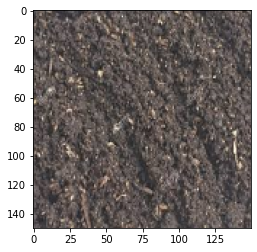

In [80]:
show_soil("/content/sample_data/Soil_Dataset/train/Black soil/10.jpg")

In [81]:
trainGen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
testGen = ImageDataGenerator(rescale=1./255)

In [82]:
train = trainGen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size,shuffle=True)
test = testGen.flow_from_directory(test_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size)

Found 58 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [83]:
model = Sequential()
model.add(Conv2D(128, (3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,3,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,3,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Flatten())
model.add(Dense(32,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 128)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 32)         

In [84]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [85]:
model.fit(train,epochs=15,validation_data=test)

Epoch 1/15
2/2 [==============================] - 6s 3s/step - loss: 1.0985 - acc: 0.3103 - val_loss: 1.0797 - val_acc: 0.3621
Epoch 2/15
2/2 [==============================] - 4s 2s/step - loss: 1.0764 - acc: 0.3448 - val_loss: 1.0559 - val_acc: 0.6034
Epoch 3/15
2/2 [==============================] - 4s 2s/step - loss: 1.0621 - acc: 0.4483 - val_loss: 1.0083 - val_acc: 0.6034
Epoch 4/15
2/2 [==============================] - 4s 2s/step - loss: 1.0194 - acc: 0.5172 - val_loss: 0.9475 - val_acc: 0.6034
Epoch 5/15
2/2 [==============================] - 4s 2s/step - loss: 0.9609 - acc: 0.5517 - val_loss: 0.8556 - val_acc: 0.6034
Epoch 6/15
2/2 [==============================] - 5s 2s/step - loss: 0.8762 - acc: 0.5862 - val_loss: 0.7625 - val_acc: 0.6034
Epoch 7/15
2/2 [==============================] - 7s 3s/step - loss: 0.8031 - acc: 0.5862 - val_loss: 0.6902 - val_acc: 0.6034
Epoch 8/15
2/2 [==============================] - 4s 2s/step - loss: 0.6849 - acc: 0.6207 - val_loss: 0.6161 - 

In [86]:
model.history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [87]:
train_loss = model.history.history['loss']
train_loss

[1.098689214936618,
 1.0770509530758035,
 1.0613567459172215,
 1.0161742259716164,
 0.959354739764641,
 0.8772686247167916,
 0.801072174105151,
 0.6895739682789507,
 0.6222904920578003,
 0.6492152152390316,
 0.56047673677576,
 0.5127051369897251,
 0.5077928982931992,
 0.5156958164839909,
 0.4852605749820841]

In [88]:
train_acc = model.history.history['acc']
train_acc

[0.31034482,
 0.3448276,
 0.44827586,
 0.51724136,
 0.55172414,
 0.5862069,
 0.5862069,
 0.62068963,
 0.6034483,
 0.6034483,
 0.62068963,
 0.62068963,
 0.63793105,
 0.63793105,
 0.63793105]

In [89]:
test_loss = model.history.history['val_loss']
test_loss

[1.0796663761138916,
 1.0558983087539673,
 1.0083120465278625,
 0.9474844932556152,
 0.8556050360202789,
 0.7625182867050171,
 0.690228283405304,
 0.616146057844162,
 0.5689255148172379,
 0.5556299537420273,
 0.5660660564899445,
 0.5130860507488251,
 0.5491515398025513,
 0.5079878270626068,
 0.4796639382839203]

In [90]:
test_acc = model.history.history['val_acc']
test_acc

[0.36206895,
 0.6034483,
 0.6034483,
 0.6034483,
 0.6034483,
 0.6034483,
 0.6034483,
 0.6034483,
 0.6034483,
 0.6034483,
 0.6034483,
 0.6034483,
 0.6034483,
 0.6034483,
 0.67241377]

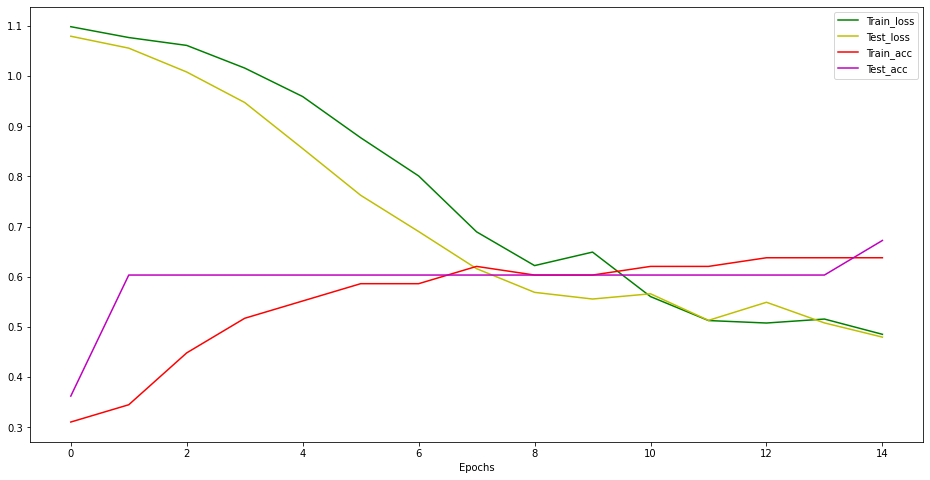

In [91]:
plt.figure(figsize=(16,8))
epochs=15
plt.plot(np.arange(epochs),train_loss,color='g',label='Train_loss')
plt.plot(np.arange(epochs),test_loss,color='y',label='Test_loss')
plt.plot(np.arange(epochs),train_acc,color='r',label='Train_acc')
plt.plot(np.arange(epochs),test_acc,color='m',label='Test_acc')
plt.legend()
plt.xlabel('Epochs')
plt.show()

In [92]:
loss,acc = model.evaluate(test)
print('Test Loss:' ,loss)
print('Test Acc:' ,acc)

2/2 [==============================] - 1s 455ms/step - loss: 0.4859 - acc: 0.6724
Test Loss: 0.48594602942466736
Test Acc: 0.67241377


In [93]:
labels

['Cinder soil', 'Black soil', 'Laterite soil']

In [94]:
def predict_soil(path):
  im = cv2.imread(path)
  im_resized = cv2.resize(im, (img_height,img_width), interpolation=cv2.INTER_LINEAR)

  plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
  plt.show()

  img_pred = image.load_img(path,target_size=(img_height,img_width))
  img_pred = image.img_to_array(img_pred)
  img = np.expand_dims(img_pred,axis=0)
  result = model.predict_classes(img)
  prob = model.predict_proba(img)
  print('Predicted class: ',result)
  print('Probability:{}'.format(prob[0]))
  if result[0]==0:
    prediction ="Cinder soil"
  elif result[0]==1:
     prediction ="Black soil"
  else:
     prediction ="Laterite soil "

  print('Predicted Class:',prediction)
     

In [95]:
from keras.preprocessing import image

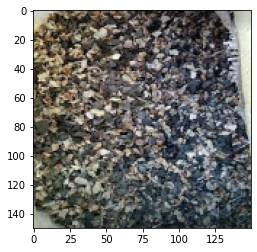

Predicted class:  [0]
Probability:[1. 0. 0.]
Predicted Class: Cinder soil


In [96]:
predict_soil("/content/sample_data/Soil_Dataset/train/Cinder soil/1.jpg")

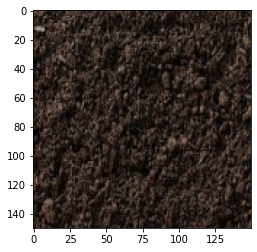

Predicted class:  [1]
Probability:[4.7452536e-06 9.9999523e-01 0.0000000e+00]
Predicted Class: Black soil


In [99]:
predict_soil("/content/sample_data/Soil_Dataset/test/Black soil/26.jpg")

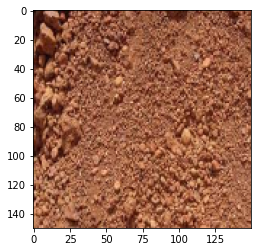

Predicted class:  [2]
Probability:[0. 0. 1.]
Predicted Class: Laterite soil 


In [100]:
predict_soil("/content/sample_data/Soil_Dataset/test/Laterite soil/23.jpg")